In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [5]:
csv_path = "carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico.csv"
carpetas = pd.read_csv(csv_path,encoding="latin-1")
carpetas.head()

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,2016.0,Mayo,2016-05-19 11:15:00,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN AGENCIAS DE ATENCIÃN ESPECI...,STCMZV,UI-1CD,CUAUHTEMOC,DOCTORES,2016,Mayo,2016-05-19 13:09:32,INTERIOR VAGON DEL METRO ESTACION NIÃOS HÃRO...,NIÃOS HEROES,-99.150633,19.419482,"19.4194819998,-99.150633"
1,2015.0,Diciembre,2015-12-04 10:00:00,DENUNCIA DE HECHOS,HECHO NO DELICTIVO,INVESTIGACIÃN PARA LA ATENCIÃN DE DELITOS SE...,FDS-6,FDS-6-01,GUSTAVO A MADERO,CHALMA DE GUADALUPE,2016,Mayo,2016-05-19 13:09:56,QUERETARO NO.86 MZ 520 LT 13,NaN,-99.153112,19.549869,"19.5498689998,-99.153112"
2,2016.0,Mayo,2016-05-19 01:30:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN IZTAPALAPA,IZP-2,UI-1CD,IZTAPALAPA,LOS REYES CULHUACÃN,2016,Mayo,2016-05-19 13:21:33,CUAUHTEMOC MZ.15 LT.8,SILOS,-99.110467,19.347049,"19.3470489998,-99.110467"
3,2016.0,Mayo,2016-05-19 12:30:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN GUSTAVO A. MADERO,GAM-2,UI-1CD,GUSTAVO A MADERO,GERTRUDIS SANCHEZ 3A SECCION,2016,Mayo,2016-05-19 13:24:45,CALLE NORTE 84,ESQUINA ORIENTE 107,-99.101675,19.462630,"19.4626299998,-99.101675"
4,2016.0,Mayo,2016-05-06 18:40:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN TLAHUAC,TLH-2,UI-1SD,IZTAPALAPA,AREA FEDERAL PANTEON SAN LORENZO TEZONCO,2016,Mayo,2016-05-19 13:25:05,PROVIDENCIA,TESORO,-99.056319,19.308832,"19.3088319998,-99.056319"


In [6]:
# Separar 2018
carpetas2018=carpetas.loc[carpetas["ao_hechos"] ==2018, :]
#carpetas2018=carpetas2018.loc[carpetas2018["mes_hechos"] =="", :]



In [7]:
# Creamos la columna conducta
carpetas2018["conducta"]=carpetas2018["delito"]


C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ABUSO DE CONFIANZA", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("FRAUDE", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LA ADMINISTRACION DE JUSTICIA", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLENCIA FAMILIAR", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A NEGOCIO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE OBJETOS", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("AMENAZAS", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DENUNCIA DE HECHOS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE ACCESORIOS DE AUTO", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ABUSO DE CONFIANZA", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A CASA HABITACION SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A NEGOCIO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("NARCOMENUDEO POSESION SIMPLE", "NARCO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DESPOJO", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES INTENCIONALES POR GOLPES", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ABUSO SEXUAL", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("USURPACIÃN DE IDENTIDAD", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE DINERO", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN VIA PUBLICA SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES INTENCIONALES POR ARMA DE FUEGO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA CULPOSA", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE DOCUMENTOS", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE PEDALES", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ABUSO DE AUTORIDAD", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TENTATIVA DE EXTORSION", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A REPARTIDOR CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("FALSIFICACION DE DOCUMENTOS", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE METROBUS SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("SUSTRACCION DE MENORES", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DELITOS AMBIENTALES", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ENCUBRIMIENTO", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE MOTOCICLETA CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR OTRAS CAUSAS", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLACION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES INTENCIONALES", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES INTENCIONALES POR ARMA BLANCA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("QUEBRANTAMIENTO DE SELLOS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO POR ARMA DE FUEGO", "HOMICIDIO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE MOTOCICLETA SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ALLANAMIENTO DE MORADA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES CULPOSAS POR TRANSITO VEHICULAR", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES CULPOSAS", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("NEGACION DEL SERVICIO PUBLICO", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ABANDONO DE PERSONA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ACOSO SEXUAL", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA CULPOSA POR TRÃNSITO A AUTOMOVIL", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE TRANSPORTE PÃBLICO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE TRANSPORTE PÃBLICO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("NARCOMENUDEO POSESIÃN CON FINES DE VENTA, COMERCIO Y SUMINISTRO", "NARCO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO PÃBLICO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE PESERO COLECTIVO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO PÃBLICO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DISCRIMINACION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE OBJETOS A ESCUELA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PRIVACION DE LA LIBERTAD PERSONAL", "SECUESTRO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("INSOLVENCIA ALIMENTARIA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TORTURA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("EXTORSION", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE PLACA DE AUTOMOVIL", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A REPARTIDOR SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN NEGOCIO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("USO INDEBIDO DE ATRIBUCIONES Y FACULTADES", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("FALSEDAD DE DECLARACIONES", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A CASA HABITACION CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("RESISTENCIA DE PARTICULARES (SE OPONGA O RESISTA)", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TENTATIVA DE ROBO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PORTACION ARMA/PROHIB.", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES CULPOSAS POR CAIDA", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR SUICIDIO", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DELITOS ELECTORALES", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("USO DE DOCUMENTO FALSO", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("EJERCICIO INDEBIDO DEL SERVIDOR PUBLICO", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("COHECHO", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("CONTRA FUNCIONARIOS PUBLICOS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE METRO CON VIOLENCIA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("RESPONSABILIDAD PROFESIONAL", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIOS INTENCIONALES (OTROS)", "HOMICIDIO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR TRÃNSITO VEHICULAR (ATROPELLADO)", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO POR ARMA BLANCA", "HOMICIDIO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A OFICINA PÃBLICA SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN RESTAURANT CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PORTACION DE ARMA DE FUEGO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A CASA HABITACION Y VEHICULO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TRATA DE PERSONAS", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE ANIMALES", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE ARMA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR CAIDA", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃ‘O EN PROPIEDAD AJENA CULPOSA POR TRÃNSITO VEHICULAR A BIENES INMUEBLES", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA CULPOSA POR TRÃNSITO VEHICULAR A AUTOMOVIL", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL A BIENES INMUEBLES", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL A CASA HABITACION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PORNOGRAFIA INFANTIL", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DESOBEDENCIA DE PARTICULARES", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DISPAROS DE ARMA DE FUEGO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PRIV. ILEGAL DE LA LIB. Y ROBO DE VEHICULO", "SECUESTRO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLACION EQUIPARADA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO POR GOLPES", "HOMICIDIO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE TAXI SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ABORTO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("CORRUPCION DE MENORES", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("POSESION DE VEHICULO ROBADO", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DELITOS DE ABOGADOS PATRONOS Y LITIGANTES", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES CULPOSAS POR QUEMADURAS", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR ENFERMEDAD", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR PARO CARDIACO", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TENTATIVA DE HOMICIDIO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE PESERO COLECTIVO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TENTATIVA DE ROBO DE VEHICULO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ATAQUE A LAS VIAS DE COMUNICACION (DAÃO A VIAS O MEDIOS DE TRANSPORTE)", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR PRECIPITACION", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES CULPOSAS POR CAIDA DE VEHÃCULO EN MOVIMIENTO", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A REPARTIDOR Y VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE FLUIDOS", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE METROBUS CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("FEMINICIDIO", "HOMICIDIO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("USURPACION DE FUNCIONES", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TENTATIVA DE FRAUDE", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSPORTISTA Y VEHICULO PESADO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE ALHAJAS", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("REVELACION DE SECRETOS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("INTIMIDACION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ESTUPRO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN PARQUES Y MERCADOS CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO DE TRANSPORTE SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLACION TUMULTUARIA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR SUICIDIO EN EL METRO", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A NEGOCIO Y VEHICULO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("EXPLOTACIÃN DE MENOR O DISCAPACITADO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PLAGIO O SECUESTRO", "SECUESTRO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("USURPACION DE PROFESION", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A REPARTIDOR Y VEHICULO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A NEGOCIO Y VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("COBRANZA ILEGITIMA", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO DE TRANSPORTE CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN ECOBUS CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN RTP CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN AUTOBÃS FORÃNEO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE SALIENDO DEL CAJERO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TENTATIVA DE VIOLACION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR QUEMADURA", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR AHOGAMIENTO", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO FUERA DEL D.F (ATROPELLADO)", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH OTRAS MATERIAS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR ARMA DE FUEGO", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN RTP SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TRAFICO DE INFANTES", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR DERRUMBE", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLACION DE CORRESPONDENCIA", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DESAPARICION FORZADA DE PERSONAS", "HOMICIDIO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLACION EQUIPARADA POR CONOCIDO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR ACCIDENTE LABORAL", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DURANTE TRASLADO DE VALORES (NOMINA) CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES CULPOSAS ACCIDENTE LABORAL", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A SUCURSAL BANCARIA (SUPERMERCADO) CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN TREN LIGERO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO POR AHORCAMIENTO", "HOMICIDIO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN TROLEBUS SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PECULADO", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR TRÃNSITO VEHICULAR (CAIDA)", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR INTOXICACION", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ATAQUES A LA PAZ PUBLICA", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE MAQUINARIA CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR CONGESTION ALCOHOLICA", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TRAFICO DE INFLUENCIA", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERSONAS EXTRAVIADAS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("FALSIFICACION DE SELLOS, MARCAS, LLAVES Y OTROS", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH ANONIMAS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN TREN SUBURBANO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN TREN LIGERO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH RELACIONADAS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("OPOSICION A LA OBRA PUBLICA", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("REGULACIÃN URBANA", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A CASA HABITACION Y VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSPORTISTA Y VEHICULO PESADO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE PESERO Y VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A SUCURSAL BANCARIA (ASALTO BANCARIO) CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TENTATIVA DE SUICIDIO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR TRÃNSITO VEHICULAR", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO OFICIAL SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("EVASION DE PRESOS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH INCOMPETENCIA", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE INFANTE", "SECUESTRO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN VIA PUBLICA (NOMINA) CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO EN INTERIOR DE EMPRESA (NOMINA) SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO OFICIAL CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("OPERACIONES CON RECURSOS DE PROCEDENCIA ILICITA", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN TERMINAL DE PASAJEROS CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE MAQUINARIA SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A OFICINA PÃBLICA CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH SIN DATOS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("INHUMACIONES Y/O EXHUMACIONES", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR INSTRUMENTO PUNZO CORTANTE", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("MALTRATO ANIMAL", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VARIACION DE NOMBRE O DOMICILIO", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("BIGAMIA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO FUERA DEL D.F (COLISION)", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN CINE CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("CONTRA EL ESTADO CIVIL", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH OFICIO COLABORACION", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN HOTEL CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN TROLEBUS CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A SUCURSAL BANCARIA (SUPERMERCADO) SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("SABOTAJE", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PELIGRO DE CONTAGIO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR ASFIXIA", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ENTREGA ILEGITIMA DE UN MENOR", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ENRIQUECIMIENTO ILICITO", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("CALUMNIAS", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LENOCINIO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLACION DE LA INTIMIDAD", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("EXPOSICION DE MENORES", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DIFAMACION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("CONCUSION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH CERESO", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH FRVT", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("CAMBIO DE USO DE SUELO", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DURANTE TRASLADO DE VALORES (NOMINA) SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE Y VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR ENVENENAMIENTO", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH FDS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN TREN SUBURBANO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DENUNCIA DE HECHOS POR ROBO DE CELULAR", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO EN INTERIOR DE EMPRESA (NOMINA) CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DENUNCIA DE HECHOS POR ROBO DE CELULAR", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DENUNCIA DE HECHOS POR ROBO DE CELULAR", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DENUNCIA DE HECHOS POR ROBO DE CELULAR", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA ASFIXIA POR ALIMENTOS/ LIQUIDOS", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("USO INDEBIDO DE CONDECORACIONES UNIFORMES E INSIGNIAS", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PRIVACION DE LA LIBERTAD PERSONAL (REALIZAR ACTO SEXUAL)", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÃ“N)", "SECUESTRO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR TRÃNSITO VEHICULAR (COLISION)", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA CULPOSA POR TRÃNSITO VEHICULAR A BIENES INMUEBLES", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÃN)", "SECUESTRO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ATAQUE A LAS VIAS GENERALES DE COMUNICACIÃN", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL A VIAS DE COMUNICACION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA CULPOSA POR TRÃNSITO VEHICULAR A VIAS DE COMUNICACION", "ACCIDENTE")

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [9]:
delito=carpetas2018["conducta"].value_counts()
delito1= pd.DataFrame(delito).reset_index()
delito1.head(30)

,index,conducta
0,ROBO,81666
1,VIOLENCIA,53884
2,ASALTO,43447
3,ENGAÑO,36119
4,ADMON,14842
5,ACCIDENTE,11113
6,NARCO,5974
7,MUERTES,2337
8,HOMICIDIO,1550
9,SECUESTRO,894


In [10]:
# PARA IMPIRIMIR UNA COLUMNA ESPECIFICA
#print(delito1.iloc[11,0])

delito1=delito1.rename(columns={"index":"Conducta","conducta":"Denuncias"})

In [11]:
carpetas2018.to_csv("Carpetas2018.csv")

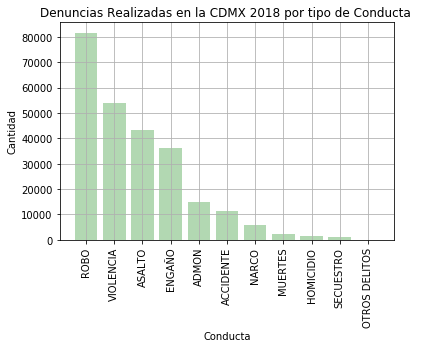

In [12]:
x_axis = np.arange(len(delito1))
denun=pd.DataFrame(delito1["Denuncias"].map("{:,}".format))


plt.bar(x_axis,delito1["Denuncias"] , color='green', alpha=.3, align="center")
plt.title("Denuncias Realizadas en la CDMX 2018 por tipo de Conducta ")
plt.xlabel("Conducta")
plt.ylabel("Cantidad")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, delito1["Conducta"],rotation=90)   
plt.grid()

In [56]:
#Recuperamos el Archivo original
csv_path = "Carpetas2018.csv"
carpetas2018= pd.read_csv(csv_path,encoding="latin-1")
carpetas2018.head()

,Unnamed: 0,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint,conducta
0,21453,2018.0,Septiembre,2018-09-30 23:10,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÃÂN EN BENITO JUÃÂREZ,BJ-1,UI-1SD,BENITO JUAREZ,CIUDAD DE LOS DEPORTES,2018,Diciembre,2018-12-01 00:00,PENSILVANIA,NaN,-99.176638,19.385574,"19.3855741511,-99.1766377348",ROBO
1,21454,2018.0,Octubre,2018-10-26 12:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,INVESTIGACIÃÂN EN MIGUEL HIDALGO,MH-1,UI-1SD,MIGUEL HIDALGO,ANAHUAC,2018,Diciembre,2018-12-01 00:19,LAGO ZIRAHUEN,NaN,-99.173020,19.444202,"19.4442020012,-99.1730199414",ENGAÃO
2,21455,2018.0,Agosto,2018-08-17 07:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÃÂN EN MIGUEL HIDALGO,MH-4,UI-2SD,MIGUEL HIDALGO,ESCANDÃÂN I SECCIÃÂN,2018,Diciembre,2018-12-01 00:37,MARTIRES DE TACUBAYA,NaN,-99.183591,19.397132,"19.3971318825,-99.1835911348",ENGAÃO
3,21456,2018.0,Octubre,2018-10-30 07:15,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÃÂN EN IZTAPALAPA,IZP-4,UI-2SD,IZTAPALAPA,EL RETOÃÂO,2018,Diciembre,2018-12-01 00:45,CALZADA DE LA VIGA,NaN,-99.122577,19.372043,"19.3720428325,-99.1225767038",ROBO
4,21457,2018.0,Noviembre,2018-11-30 13:00,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÃÂN EN MIGUEL HIDALGO,MH-1,UI-1SD,MIGUEL HIDALGO,ARGENTINA ANTIGUA,2018,Diciembre,2018-12-01 00:46,LAGO ARGENTINA,NaN,-99.200325,19.456944,"19.4569436872,-99.2003248624",ROBO


In [87]:
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("DOLORES HIDALGO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("NAUCALPAN DE JUAREZ", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("ECATEPEC DE MORELOS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("NEZAHUALCOYOTL", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("QUERETARO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("ATIZAPAN DE ZARAGOZA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CHALCO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("HUIXQUILUCAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TOLUCA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("COLON", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CUAUTITLAN IZCALLI", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CELAYA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("LEON", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TLALNEPANTLA DE BAZ", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TECAMAC", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("LA PAZ", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CUERNAVACA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CUAUTLA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("PUEBLA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("COACALCO DE BERRIOZABAL", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("ZACATECAS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CORDOBA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("MONTERREY", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("VERACRUZ", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TLAXCALA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("VALLE DE CHALCO SOLIDARIDAD", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CORREGIDORA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CHILPANCINGO DE LOS BRAVO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CHIMALHUACAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("YURIDIA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CHICONCUAC", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("XALAPA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("IRAPUATO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEHUACAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TULTITLAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CAMPECHA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("YURIRIA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("PACHUCA DE SOTO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("SAN MATIAS TLALANCALECA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("GUADALUPE", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("ALTO LUCERO DE GUTIERREZ BARRIOS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TULANCINGO DE BRAVO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CORTAZAR", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("HERMOSILLO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("MINERAL DEL MONTE", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("SANTA MARIA COYOTEPEC", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CAMPECHE", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TENANGO DEL VALLE", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("LAZARO CARDENAS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEOTITLAN DE FLORES MAGON", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("EZEQUIEL MONTES", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("AHOME", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("PROGRESO DE OBREGON", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CHICOLOAPAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("IGUALA DE LA INDEPENDENCIA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("SALAMANCA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("COLIMA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("IXTAPALUCA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("BUCTZOTZ", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("GARCIA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("BUENAVENTURA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CAÃÂADA MORELOS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEPIC", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("APASEO EL GRANDE", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CADEREYTA DE MONTES", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("AGUASCALIENTES", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("VALLE HERMOSO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("ZUMPANGO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("SAN GREGORIO ATZOMPA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("REYNOSA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("IZUCAR DE MATAMOROS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("OAXACA DE JUAREZ", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CUAUTLANCINGO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CARDONAL", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("JALAPAN DE SERRA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("ZAMORA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CULIACAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("COATZACOALCOS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TIZAYUCA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("PAPALOTLA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("POZA RICA DE HIDALGO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("NAVOJOA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEXCOCO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TAMPICO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("ALLENDE", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEOCALTICHE", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CUAUTITLAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEQUISQUIAPAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("SAN BARTOLO COYOTEPEC", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("PUERTO VALLARTA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("PATZCUARO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CHIHUAHUA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("AMECAMECA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("HUITZILAC", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("MORELOS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("SAN FRANCISCO DEL RINCON", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("NICOLAS ROMERO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TLAXCO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEOTIHUACAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("HUEHUETOCA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("MERIDA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("VILLAHERMOSA O CENTRO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("GUANAJUATO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("IXTAPAN DE LA SAL", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("GUADALAJARA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TIJUANA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("LAFRAGUA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("AMEALCO DE BONFIL", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEZOYUCA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("JALPAN DE SERRA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("OTHON P. BLANCO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("EL BOSQUE", "FUERA DE LA CDMX")



In [89]:
alcaldias=carpetas2018["alcaldia_hechos"].value_counts()
alcaldias1= pd.DataFrame(alcaldias).reset_index()
alcaldias1=alcaldias1.rename(columns={"index":"Alcaldía","alcaldia_hechos":"Denuncias"})
alcaldias1.head()

,Alcaldía,Denuncias
0,CUAUHTEMOC,40138
1,IZTAPALAPA,37326
2,GUSTAVO A MADERO,25206
3,BENITO JUAREZ,22317
4,COYOACAN,16871


In [79]:
carpetas2018.to_csv("Carpetas2018.csv")


49

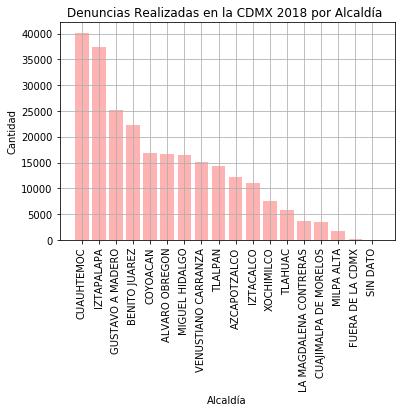

In [91]:
x_axis = np.arange(len(alcaldias1))


plt.bar(x_axis,alcaldias1["Denuncias"] , color='red', alpha=.3, align="center")
plt.title("Denuncias Realizadas en la CDMX 2018 por Alcaldía ")
plt.xlabel("Alcaldía")
plt.ylabel("Cantidad")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, alcaldias1["Alcaldía"],rotation=90)   
plt.grid()

In [92]:



base=carpetas2018.groupby(["alcaldia_hechos","conducta"]).count()["delito"].rename("Denuncias")

# Convert to DataFrame
DenunciasxAlcaldia = pd.DataFrame(base).reset_index()

# Preview DataFrame
DenunciasxAlcaldia.head(20)



,alcaldia_hechos,conducta,Denuncias
0,ALVARO OBREGON,ACCIDENTE,748
1,ALVARO OBREGON,ADMON,798
2,ALVARO OBREGON,ASALTO,3305
3,ALVARO OBREGON,ENGAÃO,2437
4,ALVARO OBREGON,HOMICIDIO,96
5,ALVARO OBREGON,MUERTES,127
6,ALVARO OBREGON,NARCO,294
7,ALVARO OBREGON,OTROS DELITOS,6
8,ALVARO OBREGON,ROBO,4751
9,ALVARO OBREGON,SECUESTRO,70


In [105]:
# Minor Data Munging to Re-Format the Data Frames
Conductaxalcaldía = DenunciasxAlcaldia.pivot(index = "conducta", columns ="alcaldia_hechos", values ="Denuncias" ) 
 
# Preview that Reformatting worked

#Conductaxalcaldía = Conductaxalcaldía.map("{:,}".format)
Conductaxalcaldía["BENITO JUAREZ"].fillna(0,inplace=True)
Conductaxalcaldía["COYOACAN"].fillna(0,inplace=True)
Conductaxalcaldía["CUAJIMALPA DE MORELOS"].fillna(0,inplace=True)
Conductaxalcaldía["FUERA DE LA CDMX"].fillna(0,inplace=True)
Conductaxalcaldía["IZTACALCO"].fillna(0,inplace=True)
Conductaxalcaldía["LA MAGDALENA CONTRERAS"].fillna(0,inplace=True)
Conductaxalcaldía["MIGUEL HIDALGO"].fillna(0,inplace=True)
Conductaxalcaldía["MILPA ALTA"].fillna(0,inplace=True)
Conductaxalcaldía["SIN DATO"].fillna(0,inplace=True)
Conductaxalcaldía["TLAHUAC"].fillna(0,inplace=True)
Conductaxalcaldía["XOCHIMILCO"].fillna(0,inplace=True)

#Conductaxalcaldía = Conductaxalcaldía["ALVARO OBREGON"].map("{:,}".format)
Conductaxalcaldía

alcaldia_hechos,ALVARO OBREGON,AZCAPOTZALCO,BENITO JUAREZ,COYOACAN,CUAJIMALPA DE MORELOS,CUAUHTEMOC,FUERA DE LA CDMX,GUSTAVO A MADERO,IZTACALCO,IZTAPALAPA,LA MAGDALENA CONTRERAS,MIGUEL HIDALGO,MILPA ALTA,SIN DATO,TLAHUAC,TLALPAN,VENUSTIANO CARRANZA,XOCHIMILCO
conducta,,,,,,,,,,,,,,,,,,
ACCIDENTE,748.0,507.0,894.0,937.0,261.0,1427.0,9.0,1130.0,479.0,1367.0,202.0,722.0,155.0,0.0,304.0,742.0,766.0,368.0
ADMON,798.0,429.0,918.0,942.0,237.0,3273.0,20.0,1264.0,568.0,2397.0,238.0,763.0,103.0,5.0,272.0,871.0,1206.0,367.0
ASALTO,3305.0,2525.0,2766.0,2045.0,247.0,5825.0,15.0,4462.0,2569.0,9145.0,288.0,3576.0,124.0,0.0,1021.0,1578.0,2132.0,1362.0
ENGAÃO,2437.0,1519.0,4898.0,2770.0,658.0,7046.0,83.0,3020.0,1159.0,3649.0,415.0,2702.0,167.0,5.0,574.0,2380.0,1615.0,778.0
HOMICIDIO,96.0,58.0,21.0,47.0,16.0,139.0,7.0,259.0,54.0,319.0,24.0,56.0,17.0,2.0,58.0,107.0,115.0,69.0
MUERTES,127.0,70.0,144.0,113.0,43.0,364.0,3.0,256.0,71.0,361.0,34.0,133.0,32.0,0.0,73.0,147.0,248.0,94.0
NARCO,294.0,180.0,116.0,341.0,63.0,1062.0,0.0,858.0,146.0,1161.0,64.0,447.0,43.0,0.0,210.0,119.0,704.0,166.0
OTROS DELITOS,6.0,3.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0
ROBO,4751.0,4234.0,9795.0,6108.0,994.0,14416.0,15.0,7946.0,3190.0,10236.0,835.0,5899.0,349.0,0.0,1321.0,4411.0,4876.0,1964.0


In [110]:
mes=carpetas2018["mes_hechos"].value_counts()
mes1= pd.DataFrame(mes).reset_index()
mes1=mes1.rename(columns={"index":"Mes","mes_hechos":"Denuncias"})
mes1.head(20)

,Mes,Denuncias
0,Octubre,22838
1,Mayo,22215
2,Agosto,21743
3,Noviembre,21305
4,Marzo,21132
5,Julio,21034
6,Septiembre,20899
7,Junio,20796
8,Abril,20694
9,Diciembre,20197


In [124]:
#carpetas2018=carpetas2018.rename(columns={"Unnamed: 0":"Expediente"})

09


In [150]:
fecha=carpetas2018["fecha_hechos"]
#carpetas2018["dia_hechos"]=""

n=0
for i in carpetas2018 :
    fecha1=fecha[n]
    fecha1=fecha1[5:7]
    



09


In [146]:
carpetas2018
print(l)
fecha1[5:7]
carpetas2018["fecha_hechos"][5:7]

carpetas2018["dia_hechos"]

dia_hechos


0         12
1         12
2         12
3         12
4         12
          ..
251845    12
251846    12
251847    12
251848    12
251849    12
Name: dia_hechos, Length: 251850, dtype: object